# Setup

In [1]:
# import libraries
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0 for all logs, 2 for errors only
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, SGD, Nadam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ReduceLROnPlateau


import numpy as np
import matplotlib.pyplot as plt
import json

## structure data as needed

In [2]:
# import database
mnist = keras.datasets.mnist

In [3]:
# load the digits and the labels from the library that stores the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# look at the shape of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.max())
print(y_train.max())
print(x_test.max())
print(y_test.max())

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
255
9
255
9


In [4]:
# split 'train' into 'train' and 'validation'
v_size = 8000 # train set will be 8000 out of 60,000

x_tr, y_tr = x_train[0:-v_size], y_train[0:-v_size]
x_va, y_va = x_train[-v_size:], y_train[-v_size:]

# change form of output from e.g. [3] to [0 0 0 1 0 0 0 0 0 0]
# (change the y of each set)
y_tr2 = tf.keras.utils.to_categorical(y_tr, 10)
y_va2 = tf.keras.utils.to_categorical(y_va, 10)
y_test2 = tf.keras.utils.to_categorical(y_test, 10)

In [5]:
# normalise input to take values between 0 and 1
x_tr = x_tr/x_train.max()
x_va = x_va/x_train.max() # use train max as no validation max
x_test = x_test/x_train.max() # train max and test max are equal

## Look at dataset

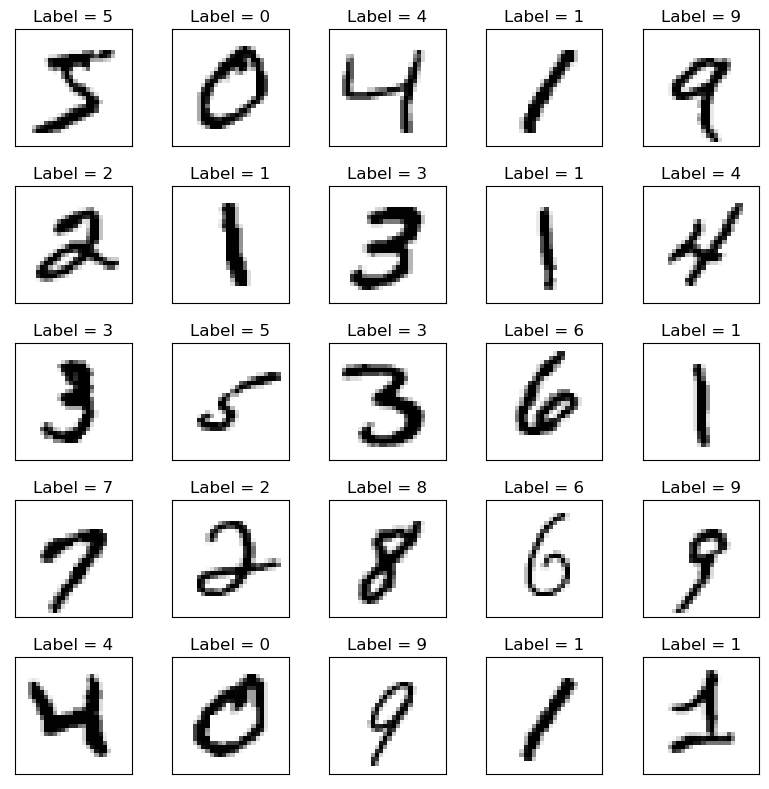

In [6]:
fig, ax=plt.subplots(5, 5, figsize = (8, 8))

for i in range(5):
    for j in range(5):
        ax[i,j].imshow(x_train[5*i+j], cmap=plt.cm.binary)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        ax[i,j].set_title('Label = ' + str(y_train[5*i+j]))
plt.tight_layout()
plt.show()

# Neural Network

## create neural network structure

In [7]:
neurons_per_layer = 256*2
learning_rate = 0.0003
# decay_rate = 0.3
# decay = learning_rate * decay_rate
batch_size = 32
epochs = 20
dropout_rate = 0.5
num_layers = 2

In [8]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3,
                              patience=3, min_lr=0.00001)

In [9]:
# for epoch in range(epochs):
#     if epochs < 20:
#         current_learning_rate = learning_rate
#     else:
#         current_learning_rate = learning_rate / (1 + decay * epoch)
# print(current_learning_rate)

In [9]:
def create_model(num_layers, neurons_per_layer, dropout_rate):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    for count in range(num_layers):
        model.add(Dense(neurons_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(10, activation='softmax'))
    
    return model

In [10]:
custom_model = create_model(num_layers, neurons_per_layer, dropout_rate)
custom_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

## training the model

In [11]:
fitting_output = custom_model.fit(x_tr, y_tr2, epochs = epochs, batch_size=batch_size, validation_data=(x_va, y_va2), callbacks=[reduce_lr])

Epoch 1/20
1625/1625 [==============================] - 10s 6ms/step - loss: 0.4214 - accuracy: 0.8707 - val_loss: 0.1419 - val_accuracy: 0.9591 - lr: 3.0000e-04
Epoch 2/20
1625/1625 [==============================] - 10s 6ms/step - loss: 0.1896 - accuracy: 0.9441 - val_loss: 0.1023 - val_accuracy: 0.9684 - lr: 3.0000e-04
Epoch 3/20
1625/1625 [==============================] - 10s 6ms/step - loss: 0.1413 - accuracy: 0.9583 - val_loss: 0.0873 - val_accuracy: 0.9726 - lr: 3.0000e-04
Epoch 4/20
1625/1625 [==============================] - 11s 7ms/step - loss: 0.1146 - accuracy: 0.9653 - val_loss: 0.0779 - val_accuracy: 0.9764 - lr: 3.0000e-04
Epoch 5/20
1625/1625 [==============================] - 10s 6ms/step - loss: 0.0989 - accuracy: 0.9690 - val_loss: 0.0759 - val_accuracy: 0.9779 - lr: 3.0000e-04
Epoch 6/20
1625/1625 [==============================] - 10s 6ms/step - loss: 0.0877 - accuracy: 0.9720 - val_loss: 0.0723 - val_accuracy: 0.9784 - lr: 3.0000e-04
Epoch 7/20
1625/1625 [======

In [12]:
training_history = fitting_output.history

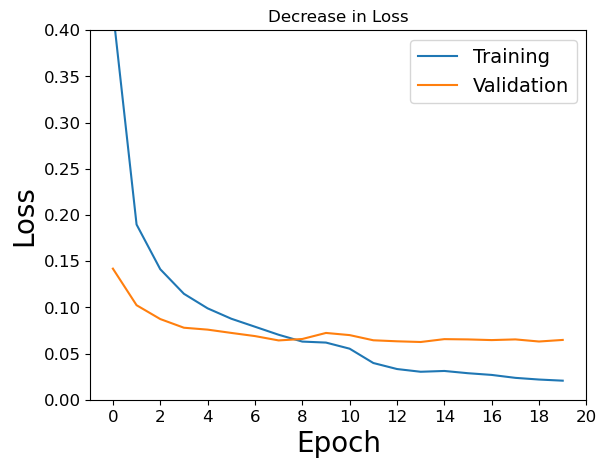

In [13]:
# plotting the decrease in loss as the network learns
fig_loss = plt.figure()
ax = fig_loss.add_subplot(111)
ax.plot(fitting_output.history['loss'], label='Training')
ax.plot(fitting_output.history['val_loss'], label='Validation')
ax.set_title('Decrease in Loss')
ax.set_ylabel('Loss', fontsize=20)
ax.set_xlabel('Epoch', fontsize=20)
ax.legend(loc='upper right', fontsize=14)
ax.tick_params(axis='both', which='both', labelsize=12)
ax.set_xticks(np.arange(0, 22, 2))
ax.set_ylim(0, 0.4)
plt.show()

In [14]:
current_learning_rate

NameError: name 'current_learning_rate' is not defined

## testing the model

In [15]:
# use the test set
predictions = custom_model.predict(x_test)
print(predictions.shape)

313/313 [==============================] - 1s 3ms/step
(10000, 10)


<function matplotlib.pyplot.show(close=None, block=None)>

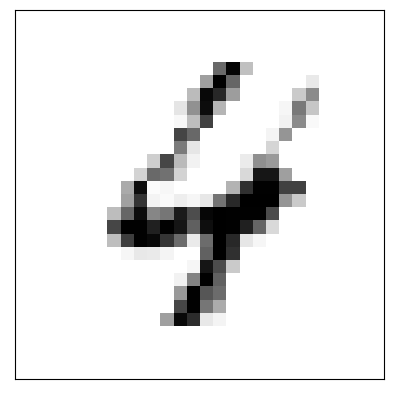

In [16]:
# to see the guesses set i to be a number between 0 and 9999

i = 6553
fig, ax=plt.subplots()
ax.imshow(x_test[i], cmap=plt.cm.binary)
ax.set_xticks([])
ax.set_yticks([])
plt.show

In [17]:
print('The probability array for the first test image is\n', predictions[i], '\nfor the first test image.\n')
print('The most likely answer is %d which has a probability of %.4lf' % 
      (np.argmax(predictions[i]), predictions[i][np.argmax(predictions[i])] ))

The probability array for the first test image is
 [8.3525792e-10 2.7612594e-09 1.6656895e-06 1.4299230e-10 9.9999398e-01
 1.3979029e-09 1.5069232e-06 1.2629994e-08 5.4959437e-10 2.7675303e-06] 
for the first test image.

The most likely answer is 4 which has a probability of 1.0000


#### best value so far
0.9836999773979187
<br>
params: l2_n512_do0.5_vlr0.0003_d8.999999999999999e-05_e20_bs32

In [18]:
# evaluate the accuracy of the entire set
evaluation_results = custom_model.evaluate(x_test, y_test2, verbose=0)
print(evaluation_results)

[0.05965206399559975, 0.9851999878883362]


In [ ]:
# # saving the data

# run = f'l{num_layers}_n{neurons_per_layer}_do{dropout_rate}_vlr{learning_rate}_d{decay_rate}_e{epochs}_bs{batch_size}'

# data_folder_name = 'dict_output_data'
# plots_folder_name = 'plots_of_output_data'
# data_file_name = f'{run}.json'
# # evaluation_filename = 'evaluation_results'
# plots_file_name = f'{run}.png'


# # Specify the folder path where you want to save the JSON file
# data_folder_path = f'output_data/{data_folder_name}'
# plots_folder_path = f'output_data/{plots_folder_name}'

# # Ensure the folder exists, create it if necessary
# os.makedirs(data_folder_path, exist_ok=True)
# os.makedirs(plots_folder_path, exist_ok=True)

# # Concatenate the folder path with the file name
# data_file_path = os.path.join(data_folder_path, data_file_name)
# plots_file_path = os.path.join(plots_folder_path, plots_file_name)

# # Prepare the output data as a dictionary
# output_dict = {
#     "loss": training_history['loss'],
#     "accuracy": training_history['accuracy'],
#     "val_loss": training_history['val_loss'],
#     "val_accuracy": training_history['val_accuracy']
# }

# # Prepare the evaluation results as a dictionary
# evaluation_dict = {
#     "test_loss": evaluation_results[0],
#     "test_accuracy": evaluation_results[1]
# }

# merged_dict = {**output_dict, **evaluation_dict}

# # Save the data
# with open(data_file_path, 'w') as file:
#     json.dump(merged_dict, file)
    
# fig_loss.savefig(plots_file_path)
# plt.show()

# print(run)